In [126]:
!pip install scikeras

In [127]:
import pandas as pd
import os
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
churn=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ai/database /CustomerChurn_dataset.csv")

In [152]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#cleaning data
churn.fillna(method='bfill', inplace=True)
churn.fillna(method='ffill', inplace=True)
churn




In [ ]:
#finding out if there is still a missing values
#print(churn.isna())
print(churn.isnull().sum())




In [132]:
from sklearn.preprocessing import LabelEncoder
encoded_col=["Churn","gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
original_churn = churn.copy()
#encoded_df
encoders = {}
for col in encoded_col:
    encoders[col] = LabelEncoder()



In [133]:
#original_churn.drop(columns=["Churn","gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"], inplace=True)

#onehot_churn = pd.concat([original_churn, encoded_df], axis=1)
for col, encoder in encoders.items():
    original_churn[col] = encoder.fit_transform(original_churn[col])
preprocessed_df = pd.concat([original_churn[encoded_col], churn['SeniorCitizen'], churn['tenure'],churn['MonthlyCharges'],churn['TotalCharges']], axis=1)
preprocessed_df

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,0,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.5
2,1,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,0,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,24,84.80,1990.5
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,72,103.20,7362.9
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,11,29.60,346.45
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,4,74.40,306.6


In [134]:
# Check data types and basic statistics
print(preprocessed_df.dtypes)
print(preprocessed_df.describe())

Churn                 int64
gender                int64
Partner               int64
Dependents            int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
TotalCharges         object
dtype: object
             Churn       gender      Partner   Dependents  PhoneService  \
count  7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean      0.265370     0.504756     0.483033     0.299588      0.903166   
std       0.441561     0.500013     0.499748     0.458110      0.295752   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.000000     0.000000     0.

In [135]:
X = preprocessed_df.drop('Churn', axis=1)
y = preprocessed_df['Churn']

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = preprocessed_df.select_dtypes(include=['int64', 'float64'])
scaled_features = scaler.fit_transform(num_features)


In [ ]:
#eda

<ipython-input-136-75c2927cf9cd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = preprocessed_df.corr(method='spearman')


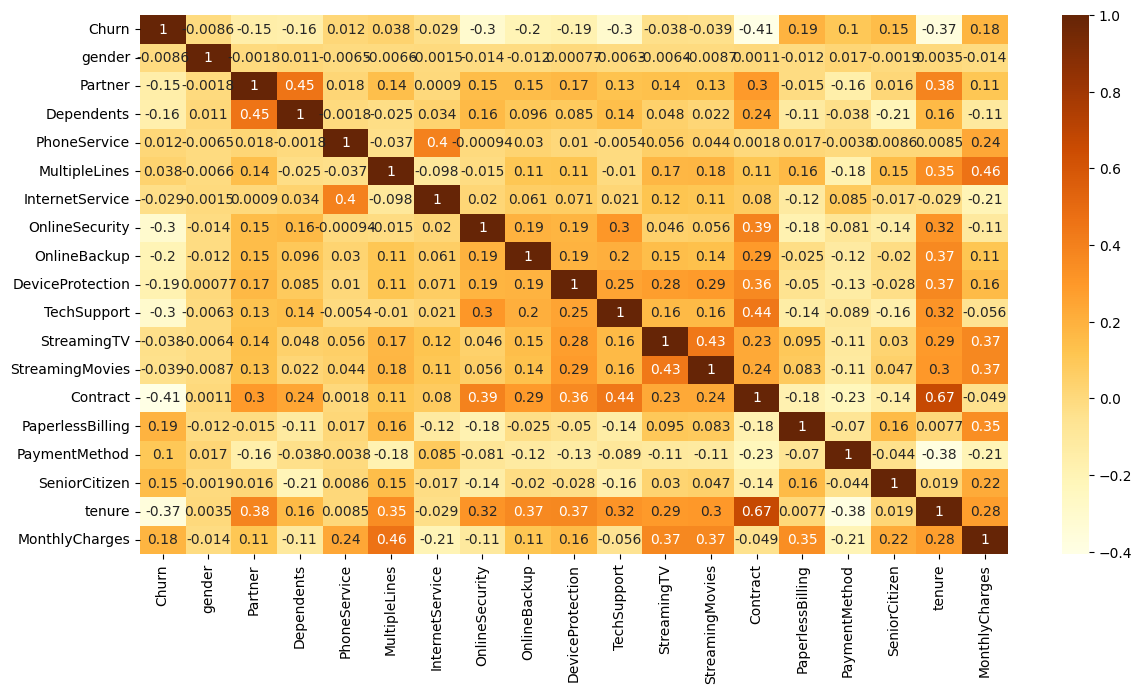

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix
corr_matrix = preprocessed_df.corr(method='spearman')
plt.figure(figsize=(14, 7))
# Generate correlation heatmap
sns.heatmap(corr_matrix, annot=True , cmap="YlOrBr" )
plt.show()


In [137]:
senior_citizen_men_with_partner_and_dependents = preprocessed_df[ (preprocessed_df['gender'] == 'Male') & (preprocessed_df['Partner'] == 'Yes') & (preprocessed_df['Dependents'] >= 1)]

churn_rate_for_specific_profile = senior_citizen_men_with_partner_and_dependents.shape[0] / preprocessed_df.shape[0]
print("Churn rate for senior citizen men with a partner and dependents:", churn_rate_for_specific_profile)


Churn rate for senior citizen men with a partner and dependents: 0.0


In [138]:
young_customers_with_no_dependents = preprocessed_df[(preprocessed_df['SeniorCitizen'] == 0) & (preprocessed_df['Dependents'] == 0)]

churn_rate_for_specific_profile = young_customers_with_no_dependents.shape[0] / preprocessed_df.shape[0]
print("Churn rate for young customers with no dependents:", churn_rate_for_specific_profile)


Churn rate for young customers with no dependents: 0.5511855743291211


In [139]:
correlation_matrix = preprocessed_df.corr()
selected_features= correlation_matrix['Churn'].sort_values(ascending=False).index
selected_features[:12]


<ipython-input-139-c04f02c0c4e7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = preprocessed_df.corr()


Index(['Churn', 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen',
       'PaymentMethod', 'MultipleLines', 'PhoneService', 'gender',
       'StreamingTV', 'StreamingMovies', 'InternetService', 'Partner'],
      dtype='object')

In [140]:
selected_features=['Churn', 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen',
       'PaymentMethod', 'MultipleLines', 'PhoneService', 'gender',
       'StreamingTV', 'StreamingMovies', 'InternetService', 'Partner']

In [141]:
new_df = selected_features.copy()
new_churn=pd.DataFrame(preprocessed_df[new_df])
new_churn.head()


,Churn,MonthlyCharges,PaperlessBilling,SeniorCitizen,PaymentMethod,MultipleLines,PhoneService,gender,StreamingTV,StreamingMovies,InternetService,Partner
0,0,29.85,1,0,2,1,0,0,0,0,0,1
1,0,56.95,0,0,3,0,1,1,0,0,0,0
2,1,53.85,1,0,3,0,1,1,0,0,0,0
3,0,42.30,0,0,0,1,0,1,0,0,0,0
4,1,70.70,1,0,2,0,1,0,0,0,1,0


EDA for dataset

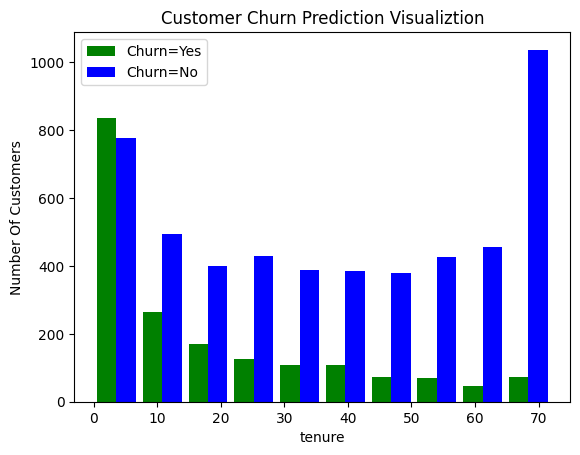

In [147]:
#eda
churn[churn.Churn=='No']
tenure_churn_no = churn[churn.Churn=='No'].tenure
tenure_churn_yes = churn[churn.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.85, color=['green','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()

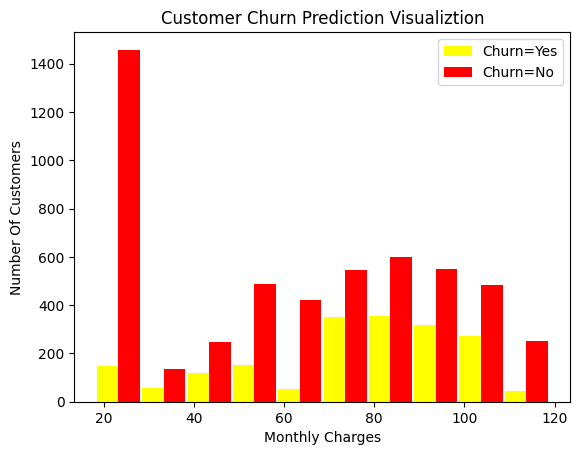

In [148]:
mc_churn_no = churn[churn.Churn=='No'].MonthlyCharges
mc_churn_yes = churn[churn.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['yellow','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

trainiing and testing

In [142]:
#training and testing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
# Separate features and target variable
X = new_churn.drop('Churn', axis=1)
y = new_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = X.select_dtypes(include=['int64', 'float64'])
X_scaled = scaler.fit_transform(num_features)
# Convert the data to tensors
X = tf.convert_to_tensor(X_scaled, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.int32)

In [143]:
import pickle
with open('scaler.pkl','wb')as scaler_file:
  pickle.dump(scaler,scaler_file)

In [123]:
def create_mlp_model(hidden_units=128, optimizer='adam'):
    # Define the input layer
    inputs = tf.keras.Input(shape=(X_scaled.shape[1],))

    # Define the hidden layers
    hidden_layer1 = tf.keras.layers.Dense(hidden_units, activation='relu')(inputs)
    hidden_layer2 = tf.keras.layers.Dense(100, activation='relu')(hidden_layer1)
    hidden_layer3 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer2)
    hidden_layer4 = tf.keras.layers.Dense(32, activation='relu')(hidden_layer3)
    hidden_layer5 = tf.keras.layers.Dense(16, activation='relu')(hidden_layer4)

    # Define the output layer
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(hidden_layer4)

    # Create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = KerasClassifier(build_fn=create_mlp_model, epochs=10, batch_size=32, verbose=0,hidden_units=128)

# Define the hyperparameters to tune
param_grid = {
    'hidden_units': [20,25.32],
    'optimizer': ['adam', 'rmsprop']
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(), scoring='accuracy', verbose=1)

# Perform grid search
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_

# Use the best parameters to create and train the final model
final_model = create_mlp_model(**best_params)
final_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)

# Save the final model to a .h5 file
final_model.save('final_model.h5')

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Epoch 1/10
177/177 [==============================] - 5s 6ms/step - loss: 0.6022 - accuracy: 0.7183
Epoch 2/10
177/177 [==============================] - 1s 7ms/step - loss: 0.5646 - accuracy: 0.7268
Epoch 3/10
177/177 [==============================] - 1s 6ms/step - loss: 0.5557 - accuracy: 0.7265
Epoch 4/10
177/177 [==============================] - 1s 6ms/step - loss: 0.5459 - accuracy: 0.7318
Epoch 5/10
177/177 [==============================] - 1s 5ms/step - loss: 0.5341 - accuracy: 0.7378
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.7380
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.7366
Epoch 8/10
177/177 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.7425
Epoch 9/10
177/177 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7426
Epoch 10/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.7360
T

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [124]:
# Evaluate the model on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)

# Save the final model to a .h5 file
final_model.save('final_model.h5')

45/45 [==============================] - 0s 3ms/step - loss: 0.4956 - accuracy: 0.7360
Test Accuracy: 0.7359829545021057


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [125]:
from sklearn.metrics import roc_auc_score
# Predict probabilities on the test set
y_probs = final_model.predict(X_test)

# Calculate AUROC
auroc = roc_auc_score(y_test, y_probs)
print("AUROC on Test Set:", auroc)


45/45 [==============================] - 0s 2ms/step
AUROC on Test Set: 0.781638494104982
